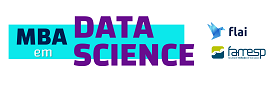

# **Taxa de Homicídio no Brasil**

## **Entendendo o contexto**

### **Homicídio Doloso no Brasil**

Vivemos bombarbeado de notícias sobre violência, seja nas mídias impressas, internet, TV, rádio, e todo instantes estamos ouvindo/vendo/lendo algo relacionados a agressões ou até mesmo homicídios. Um homícidio, é o ato de tirar a vida de ser humano, e ele pode ser classificado como doloso ou culposo. O Doloso é quando há intenção de matar e o culposo quando não há.


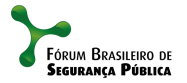

### **O Objetivo da Aula**

Apresentar uma visualização que demonstre as taxas de homicídios dolosos nas diferentes unidades da federação do Brasil.

### **O dataset**

Os dados são oriundos dos registros das secretarias estaduais de segurança pública, e foram organizados pelo Fórum Brasileiro de Segurança Pública, cujo painel de dados está acessível através do endereço http://forumseguranca.org.br:3838/.

Nesses conjuntos de dados é uma unidade da federação do Brasil em determinado ano e possui 10 atributos:

- **sigla_uf:** Sigla da Unidade da Federação 
- **nome_regiao:** Nome da Grande Região
- **codigo_regiao:** Código da Grande Região
- **nome_uf:** Npme  da Unidade da Federação
- **codigo_uf:** Código da Unidade da Federação
- **latitude:** Latitude
- **longitude:**  Longitude
- **ano:** Ano
- **homicidios:** Número de homicídios doloso
- **tx_homicidios:** Taxa de homicídio doloso

Este conjunto já organizado em formato csv encontra-se disponível em:
- https://raw.githubusercontent.com/jonates/opendata/master/homicidios_dolosos/homicidios_dolosos.csv



### **O arquivo com dados geoespaciais**

Para realizar o Cartograma é preciso do arquivo georreferenciado que vai delimitar as unidades da federação do Brasil.

Este arquivo em formato geojson encontra-se disponível em:
- https://raw.githubusercontent.com/jonates/opendata/master/arquivos_geoespaciais/unidades_da_federacao.json


### **A Biblioteca Folium**

folium é uma biblioteca que aproveita todo o poder do Python para manipulação de dados e da biblioteca leaflet.js para elaboração de mapas.

Para maiores informações do Folium, consulte a documentação no endereço a seguir:

- https://github.com/python-visualization/folium

## **Hands-on**

1. **Preparar o ambiente**;
2. **Carregar dados**;
3. **Entender a estrutura dos dados**;
4. **Transformar dados**;
5. **Elaboração do Cartograma**.

### **Carregando o conjunto de dados**

In [1]:
# Fazendo download do conjunto de dados
!wget --verbose --show-progress --no-check-certificate https://raw.githubusercontent.com/jonates/opendata/master/homicidios_dolosos/homicidios_dolosos.csv


--2022-05-08 04:11:55--  https://raw.githubusercontent.com/jonates/opendata/master/homicidios_dolosos/homicidios_dolosos.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13927 (14K) [text/plain]
Saving to: ‘homicidios_dolosos.csv’

homicidios_dolosos. 100%[===================>]  13.60K  --.-KB/s    in 0s      

2022-05-08 04:11:55 (40.2 MB/s) - ‘homicidios_dolosos.csv’ saved [13927/13927]



In [2]:
# Importando o Pandas
import pandas as pd

In [4]:
# Importando o conjunto de dados da PNAD Contínua
hd = pd.read_csv(
    filepath_or_buffer = '/content/homicidios_dolosos.csv', 
    sep = ';',
    decimal = ',',
    encoding = 'utf-8'
)

# Espiando o conjunto de dados
hd

,sigla_uf,nome_regiao,codigo_regiao,nome_uf,codigo_uf,latitude,longitude,ano,homicidios,tx_homicidios
0,AC,Norte,1,Acre,12,-8.77,-70.55,2012,177,23.3
1,AL,Nordeste,2,Alagoas,27,-9.62,-36.82,2012,2040,64.4
2,AM,Norte,1,Amazonas,13,-3.47,-65.10,2012,1086,30.2
3,AP,Norte,1,Amapá,16,1.41,-51.77,2012,164,23.5
4,BA,Nordeste,2,Bahia,29,-13.29,-41.71,2012,5879,41.5
...,...,...,...,...,...,...,...,...,...,...
247,SC,Sul,4,Santa Catarina,42,-27.45,-50.95,2020,689,9.5
248,SE,Nordeste,2,Sergipe,28,-10.57,-37.45,2020,761,32.8
249,SP,Sudeste,3,São Paulo,35,-22.19,-48.79,2020,3038,6.6
250,TO,Norte,1,Tocantins,17,-9.46,-48.26,2020,403,25.3


### **Espiando a estrutura dos dados**

In [5]:
# Informacoes gerais do conjunto de dados
hd.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sigla_uf       252 non-null    object 
 1   nome_regiao    252 non-null    object 
 2   codigo_regiao  252 non-null    int64  
 3   nome_uf        252 non-null    object 
 4   codigo_uf      252 non-null    int64  
 5   latitude       243 non-null    float64
 6   longitude      243 non-null    float64
 7   ano            252 non-null    int64  
 8   homicidios     252 non-null    int64  
 9   tx_homicidios  252 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 19.8+ KB


### **Transformação do conjunto de dados**

In [6]:
# Filtrando somente as instancia do ano de 2020
hd_uf_2020 = hd.query('(ano==2020) & (sigla_uf!="BR")')

In [7]:
# Espiando o conjunto de dados filtrado
hd_uf_2020

,sigla_uf,nome_regiao,codigo_regiao,nome_uf,codigo_uf,latitude,longitude,ano,homicidios,tx_homicidios
224,AC,Norte,1,Acre,12,-8.77,-70.55,2020,280,31.3
225,AL,Nordeste,2,Alagoas,27,-9.62,-36.82,2020,1218,36.3
226,AM,Norte,1,Amazonas,13,-3.47,-65.10,2020,954,22.7
227,AP,Norte,1,Amapá,16,1.41,-51.77,2020,226,26.2
228,BA,Nordeste,2,Bahia,29,-13.29,-41.71,2020,5368,36.0
229,CE,Nordeste,2,Ceará,23,-5.20,-39.53,2020,3934,42.8
230,DF,Centro-Oeste,5,Distrito Federal,53,-15.83,-47.86,2020,384,12.6
231,ES,Sudeste,3,Espírito Santo,32,-19.19,-40.34,2020,1103,27.1
232,GO,Centro-Oeste,5,Goiás,52,-15.98,-49.86,2020,1468,20.6
233,MA,Nordeste,2,Maranhão,21,-5.42,-45.44,2020,1859,26.1


### **Carregando o arquivo com dados geoespaciais das regiões do Brasil**

In [8]:
#Instalando o Geopandas
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 16.7 MB 289 kB/s 
     |████████████████████████████████| 6.3 MB 49.1 MB/s 


In [9]:
# Importando bibliotecas necessárias
import geopandas as gpd
import json
#import requests

In [10]:
# Pegando o geojson
url_geojson = 'https://raw.githubusercontent.com/jonates/opendata/master/arquivos_geoespaciais/unidades_da_federacao.json'
geoespaciais = gpd.read_file(url_geojson)

In [11]:
# Espiando o objeto
geoespaciais.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   NM_ESTADO  27 non-null     object  
 1   NM_REGIAO  27 non-null     object  
 2   CD_GEOCUF  27 non-null     object  
 3   geometry   27 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 992.0+ bytes


In [12]:
# Renomeando código da UF para ficar igual do arquivo geoespacial
hd_uf_2020.rename(columns={"codigo_uf": "CD_GEOCUF"}, inplace = True);

#Transformando o código da UF em uma atributo 'object'
hd_uf_2020['CD_GEOCUF'] = hd_uf_2020['CD_GEOCUF'].astype('str');

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
# Levando os dados para dentro do objeto geoespacial
geoespaciais = geoespaciais.merge(hd_uf_2020[['CD_GEOCUF', 'nome_uf', 'tx_homicidios',]], on='CD_GEOCUF')

In [14]:
# Espiando o objeto
geoespaciais.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   NM_ESTADO      27 non-null     object  
 1   NM_REGIAO      27 non-null     object  
 2   CD_GEOCUF      27 non-null     object  
 3   geometry       27 non-null     geometry
 4   nome_uf        27 non-null     object  
 5   tx_homicidios  27 non-null     float64 
dtypes: float64(1), geometry(1), object(4)
memory usage: 1.5+ KB


### **Mapa com taxa de desocupação por 'Grandes Regiões' do Brasil no 4º trimestre de 2021**

In [15]:
# Importando as bibliotecas necessarias
import folium

In [16]:
# Criando o mapa base
mapa_uf = folium.Map(
    width=800, 
    height=600, 
    location=[-12.97, -38.51], 
    zoom_start=4, 
    tiles="cartodbpositron"
)

# Visualizando o mapa base
mapa_uf

In [21]:
# Criando a camada Choroplet
mapa = folium.Choropleth(
    geo_data = geoespaciais,
    name ='choropleth',
    data = hd_uf_2020,
    columns=['CD_GEOCUF', 'tx_homicidios'],
    key_on='feature.properties.CD_GEOCUF',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.9,
    legend_name='Taxa de Homocídio Doloso (em %)',
    highlight = True,
    reset=True 
).add_to(mapa_uf)

# Renderizando o mapa
mapa_uf

In [20]:
# Inserindo os rotulos ao passar o mouse
mapa.geojson.add_child(
  folium.features.GeoJsonTooltip(
      fields=['nome_uf', 'tx_homicidios'],
      aliases=['Unidade da Federação:', 'Taxa de Homicídio:'],
      labels=True,
      localize=True,
      sticky=False,
  )
)

# Exibindo o mapa
mapa_uf

### **Faça Você mesmo**

Construa um Cartograma com a taxa de desocupação entre as Regiões do Brasil, no quarto trimestre de 2021. Para tanto utilize os recursos disponibilizados nos links a seguir:

**Conjunto de dados** https://raw.githubusercontent.com/jonates/opendata/master/pnad_continua/pnadct_regiao.csv

**Geojson com os polígonos das Regiões** https://github.com/jonates/opendata/raw/master/arquivos_geoespaciais/grandes_regioes.geojson